# Building a model for CO2 forecasting based on the time serie dataset

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

In [2]:
df = pd.read_csv("../datasets/Time-series-datasets/co2.csv",sep=',')
df.head()

,time,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4


## Preprocessing

In [3]:
print("Null count:\n", df.isnull().sum())
print("NA count:\n",df.isna().sum())

Null count:
 time     0
co2     59
dtype: int64
NA count:
 time     0
co2     59
dtype: int64


In [4]:
# df[df['co2'].isna()]

In [5]:
df['time'] = pd.to_datetime(df['time'])
df['co2'] = df['co2'].interpolate()
# Hoăc cách này
# df.set_index('time', inplace=True)
# df['co2'] = df['co2'].interpolate(method='time')

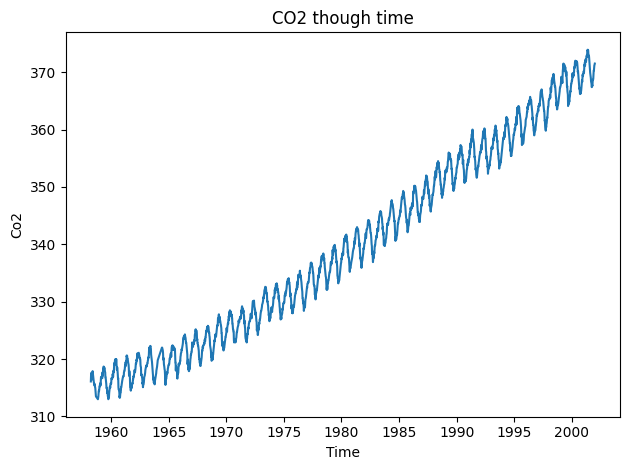

In [6]:
fig, ax = plt.subplots()

ax.set_title("CO2 though time")
# ax.plot(df['time'], df['co2'])
ax.plot(df['time'], df['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('Co2')
fig.tight_layout()
plt.show()

In [7]:
window_size = 5
count = 1

while count < window_size:
    df[f'co2_{count}'] = df['co2'].shift(-count)
    count += 1
df['target'] = df['co2'].shift(-count)


In [8]:
df.head(6)

,time,co2,co2_1,co2_2,co2_3,co2_4,target
0,1958-03-29,316.1,317.3,317.6,317.5,316.40,316.90
1,1958-04-05,317.3,317.6,317.5,316.4,316.90,317.20
2,1958-04-12,317.6,317.5,316.4,316.9,317.20,317.50
3,1958-04-19,317.5,316.4,316.9,317.2,317.50,317.90
4,1958-04-26,316.4,316.9,317.2,317.5,317.90,317.55
5,1958-05-03,316.9,317.2,317.5,317.9,317.55,317.20


In [9]:
df.tail(6)

,time,co2,co2_1,co2_2,co2_3,co2_4,target
2278,2001-11-24,370.3,370.3,370.8,371.2,371.3,371.5
2279,2001-12-01,370.3,370.8,371.2,371.3,371.5,NaN
2280,2001-12-08,370.8,371.2,371.3,371.5,NaN,NaN
2281,2001-12-15,371.2,371.3,371.5,NaN,NaN,NaN
2282,2001-12-22,371.3,371.5,NaN,NaN,NaN,NaN
2283,2001-12-29,371.5,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df.dropna(axis=0)

In [11]:
df.tail(6)

,time,co2,co2_1,co2_2,co2_3,co2_4,target
2273,2001-10-20,368.1,368.7,368.7,368.8,369.7,370.3
2274,2001-10-27,368.7,368.7,368.8,369.7,370.3,370.3
2275,2001-11-03,368.7,368.8,369.7,370.3,370.3,370.8
2276,2001-11-10,368.8,369.7,370.3,370.3,370.8,371.2
2277,2001-11-17,369.7,370.3,370.3,370.8,371.2,371.3
2278,2001-11-24,370.3,370.3,370.8,371.2,371.3,371.5


### Split data
- Features & target
- Train & test

In [12]:
X = df.drop(['time', 'target'], axis=1)
X.head()

,co2,co2_1,co2_2,co2_3,co2_4
0,316.1,317.3,317.6,317.5,316.4
1,317.3,317.6,317.5,316.4,316.9
2,317.6,317.5,316.4,316.9,317.2
3,317.5,316.4,316.9,317.2,317.5
4,316.4,316.9,317.2,317.5,317.9


In [13]:
y  = df['target']
y

0       316.90
1       317.20
2       317.50
3       317.90
4       317.55
         ...  
2274    370.30
2275    370.80
2276    371.20
2277    371.30
2278    371.50
Name: target, Length: 2279, dtype: float64

In [14]:
# Split into training & testing
train_ratio = 0.8
num_of_samples = X.shape[0]

training_size = int(num_of_samples * train_ratio)

# X_train = X.iloc[:X_train_size,:]
X_train = X[:training_size]
X_test = X[training_size:]
y_train = y[:training_size]
y_test = y[training_size:]

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1823, 5)
(1823,)
(456, 5)
(456,)


### Building model

In [16]:
# preprocessor = StandardScaler()
reg = Pipeline(steps=[
    ('preprocessor',StandardScaler()),
    ('model', RandomForestRegressor())
])

reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor', StandardScaler()),
                ('model', RandomForestRegressor())])

In [17]:
y_pred = reg.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE: ",mse)
print("MSE: ",mae)
print("MSE: ",r2)

MSE:  49.31868843201387
MSE:  5.600353070175186
MSE:  -1.069266361794051


In [19]:
# Using LInear REgression
reg2 = Pipeline(steps=[
    ('preprocessor',StandardScaler()),
    ('model', LinearRegression())
])

reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE: ",mse)
print("MSE: ",mae)
print("MSE: ",r2)

MSE:  0.2204494736034643
MSE:  0.3605603788359215
MSE:  0.9907505918201437


### Visualization

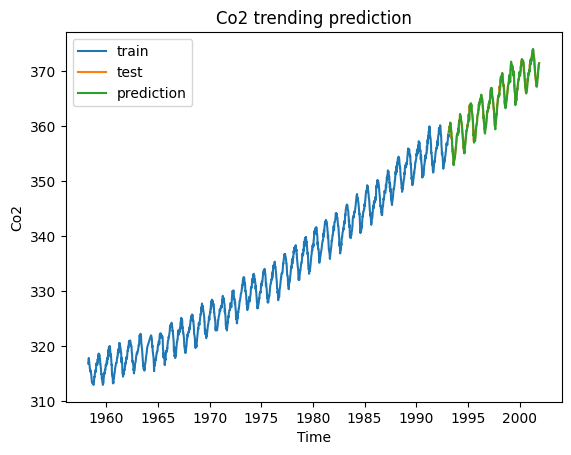

In [20]:
fg, ax = plt.subplots()

ax.set_title("Co2 trending prediction")
ax.set_xlabel("Time")
ax.set_ylabel("Co2")
ax.plot(df['time'][:training_size], y_train, label='train')
ax.plot(df['time'][training_size:], y_test, label='test')
ax.plot(df['time'][training_size:], y_pred,label='prediction')

ax.legend()
plt.show()

In [21]:
y_test

1823    358.8
1824    359.4
1825    360.0
1826    359.6
1827    359.7
        ...  
2274    370.3
2275    370.8
2276    371.2
2277    371.3
2278    371.5
Name: target, Length: 456, dtype: float64

### Save and load model

In [23]:
# Save
filename = 'model.pkl'
pickle.dump(reg2,open(filename,'wb'))

In [24]:
# Load
reg_model = pickle.load(open(filename,'rb'))

In [ ]:
# Use
new_data = [
    [320.1,	321.3,	322.6,	323.5,	320.4],
]

# Prediction of next 10 weeks 
# Solution: recursive multi-step time series forecasting
num_of_weeks = 1

while num_of_weeks <= 10:
    print("New data: ", new_data)
    prediction = reg_model.predict(new_data)
    print(f"Week {num_of_weeks} Co2: {prediction}")
    new_data[0].append(prediction[0])
    new_data[0] = new_data[0][1:]
    num_of_weeks += 1

New data:  [[320.1, 321.3, 322.6, 323.5, 320.4]]
Week 1 Co2: [321.26801174]
New data:  [[321.3, 322.6, 323.5, 320.4, 321.268011744954]]
Week 2 Co2: [321.40967918]
New data:  [[322.6, 323.5, 320.4, 321.268011744954, 321.40967918188426]]
Week 3 Co2: [320.73955684]
New data:  [[323.5, 320.4, 321.268011744954, 321.40967918188426, 320.7395568434126]]
Week 4 Co2: [320.50324134]
New data:  [[320.4, 321.268011744954, 321.40967918188426, 320.7395568434126, 320.5032413436901]]
Week 5 Co2: [320.66066079]
New data:  [[321.268011744954, 321.40967918188426, 320.7395568434126, 320.5032413436901, 320.66066078853083]]
Week 6 Co2: [320.47052093]
New data:  [[321.40967918188426, 320.7395568434126, 320.5032413436901, 320.66066078853083, 320.47052093312874]]
Week 7 Co2: [320.32463078]
New data:  [[320.7395568434126, 320.5032413436901, 320.66066078853083, 320.47052093312874, 320.32463077646867]]
Week 8 Co2: [320.3374293]
New data:  [[320.5032413436901, 320.66066078853083, 320.47052093312874, 320.32463077646

c:\Users\ADMIN\anaconda3\envs\cs685hw\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ADMIN\anaconda3\envs\cs685hw\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ADMIN\anaconda3\envs\cs685hw\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ADMIN\anaconda3\envs\cs685hw\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\ADMIN\anaconda3\envs\cs685hw\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with f

## Nhận xét
- Với bộ dữ liệu này, Linear regression tốt hơn các mô hình phức tạp khác, vì features có tính tương quan cao với target (thực tế là target được tạo ra từ features)
- Về lý thuyết, StandardScaler không cần thiết trong trường hợp này, vì chỉ có 1 loại feature (same range)
- Tại sao RandomForest tệ trong trường hợp này?
  + Vì nó được xây dựng dựa trên các điểm dữ liệu trong tập y_train (C02 thấp hơn y_test), do đó các decision tree có range không cao như y_test, khi tính trung bình nó cũng thấp.
  + => RandomForest không có khả năng dự đoán range ngoài range chúng được huấn luyện. Ngược lại, linear regression không bị giới hạn